In [74]:
import numpy as np

muestra = [176.50, 191.50, 186.90, 181.10, 195.70,
            188.10, 187.40, 185.10, 176.90, 191.20,
            193.80, 187.00, 179.00, 173.00, 184.40,
            199.60, 190.40, 206.80, 193.00, 177.10,
            201.00, 192.50, 176.60, 180.10, 186.40]

media_muestral = np.mean(muestra)

varianza_muestral = np.std(muestra, ddof=1)**2

c = 0
for x in muestra:
    c += (x - 185)**2

c

1881.7900000000004

## Ejercicio 7

[a] Definir una funcion que, tenga por input un conjunto de datos $x = (x_1, . . . , x_n)$ provenientes de una distribucion normal y un nivel de confianza $1 − α$ y devuelva
un intervalo de confianza de nivel $1 − α$ para la media de la normal de la que provienen los datos. ¿Como cambiaria la funcion si ahora queremos aplicarla a normales con varianza conocida? ¿Y si ahora queremos aplicarla a muestras grandes pero con distribucion desconocida?

In [60]:
from scipy.stats import t, norm

def intervalo_confianza_mu(muestra: list, confianza: float,
                           varianza=None) -> tuple:

    # Dada una muestra y un nivel de confianza, devuelve el intervalo de confianza
    # para la media poblacional

    media_muestral = np.mean(muestra)
    varianza_muestral = np.std(muestra, ddof=1)**2
    n = len(muestra)
    alpha = 1 - confianza

    if varianza == None:
        # Caso media y varianza poblacional desconocidas
        inferior = media_muestral - (abs(t.ppf(alpha/2, n-1)) * varianza_muestral / np.sqrt(n))
        superior = media_muestral + (abs(t.ppf(alpha/2, n-1)) * varianza_muestral / np.sqrt(n))
    else:
        # Caso varianza conocida
        inferior = media_muestral - (norm.ppf(alpha/2) * varianza / np.sqrt(n))
        superior = media_muestral + (norm.ppf(alpha/2) * varianza / np.sqrt(n))

    if inferior > superior:
        # raise Exception("El intervalo de confianza no es valido") 
        pass

    return (inferior, superior)

intervalo_confianza_mu(muestra, 0.95)

(157.04397677833046, 217.44402322166948)

In [61]:
abs(t.ppf(0.025, 19))

2.0930240544082634

[b] Elegir un valor de $µ$ y un valor de $σ$. Generar $1000$ conjuntos de datos de $n$ valores cada uno con distribucion $N(µ, σ^2)$ y calcular intervalos de confianza para $µ$ asumiendo que $µ$ es desconocido y $σ$ es conocido. Repetir para diferentes valores de $n$ entre $3$ y $1000$. ¿Que proporcion de intervalos contiene al verdadero valor de $µ$?

In [72]:
# Datos que elegi para el ejercicio
mu_0 = 0
sigma_0 = 1
n = 100

# Confianza pedida
confianza = 0.95

X = [np.random.normal(mu_0, sigma_0**2, n) for x in range(1000)]
ICs = [intervalo_confianza_mu(x, confianza) for x in X]

s = 0
for intervalo in ICs:
    if intervalo[0] <= mu_0 <= intervalo[1]:
        s += 1
    pass

proporcion = s / 1000 

proporcion # ~ confianza = 0.95

0.95

Concluyo, la propocion tiende al nivel de confianza del intervalo.

## Ejercicio 8

In [87]:
# los datos vienen de la practica 7 - ejercicio 4. 
# X ~ Exp(lambda)

from scipy.stats import chi2

muestra = [39.08, 45.27, 26.27, 14.77, 65.84, 49.64, 0.80, 66.58, 69.60, 32.42, 228.36, 64.79, 9.38,
           3.86, 37.18, 104.75, 3.64, 104.19, 8.17, 8.36]

confianza = 0.95
alpha = 1 - confianza
n = len(muestra)

inferior = chi2.ppf(alpha/2, 2*n) / (2*sum(muestra))
superior = chi2.ppf(1-alpha/2, 2*n) / (2*sum(muestra)) 

(inferior, superior) # intervalo de confianza para lambda

(0.012428424218326413, 0.03018551663012929)

In [88]:
1 / np.mean(muestra) # estimacion de lambda por maxima verosimilitud

0.020346914899028436

## Ejercicio 11 

In [120]:
# Intervalo de confianza de una Poisson 
from scipy.stats import poisson

n = 20000
alpha = 0.1
muestra_poisson = poisson.rvs(mu=5, size=n)

inferior = np.mean(muestra_poisson)*(1-abs(norm.ppf(alpha/2)/n))
superior = np.mean(muestra_poisson)*(1+abs(norm.ppf(alpha/2)/n))

(inferior, superior)

(5.0007386920141785, 5.001561307985821)

## Ejercicio 13

In [129]:
muestra_x1 = [0.44, -1.63, 2.59, 1.54, 0.45, -0.13, -2.76, -1.53]
muestra_x2 = [0.06, -0.24, 4.65, 2.27, 3.88, 2.35, 3.92, -0.73]

np.var(muestra_x2, ddof=1)

4.381371428571429

In [130]:
norm.ppf(0.025)

-1.9599639845400545

C:\Users\sebas\AppData\Local\Temp/ipykernel_22364/2671417689.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  return 200*(0.135-x)/(math.sqrt(x*(1-x)))


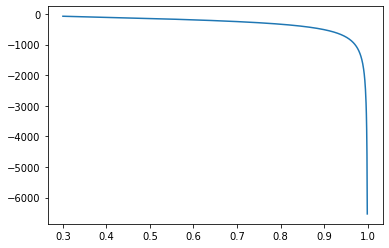

In [20]:
import numpy as np
import math
import matplotlib.pyplot as plt

X = np.linspace(0.3, 1, 1000)

def k(x):
    return 200*(0.135-x)/(math.sqrt(x*(1-x)))

y = [k(x) for x in X]

plt.plot(X,y)


In [25]:
from scipy.stats import norm

norm.pdf(9.68)

1.7934630572937176e-21

In [27]:
d = [198,185,214,189,206,212,193,209,196,211,189,198,211,191,199]
np.std(d, ddof=1)

9.713515375618702